<a href="https://colab.research.google.com/github/heitorabqg/datascientist/blob/master/PSI5892_HA_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PARTE 1


/tmp/ipython-input-3177695400.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X[i,j] = np.cos(w0*j*t[i])
/tmp/ipython-input-3177695400.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X[i,j+1] = np.sin(w0*j*t[i])


'\n# tentativa de fazer 4 vezes o período, que não funcionou\nfor indexT4 in range(1,K+1):\n  y4 = y4 + v[indexT4]*np.cos(w0*indexT4*t4) + v[indexT4+1]*np.sin(w0*indexT4*t4)\n\ny4 = y4 + v[0]\n\nprint (y4.shape)\nplt.figure(figsize=(12, 12))\n#plt.subplot(2, 1, 1)\nplt.plot(t4 , y4, "b")\n#plt.plot(t , y, "or")\n#plt.plot(x , d, "or")\nplt.grid()\nplt.title(\n    \n        "Aproximação f(t) por serie de Fourier 4T"\n    \n)\nplt.xlabel("Tempo (s)")\nplt.ylabel("Frequencia (Hz)")\n\n'

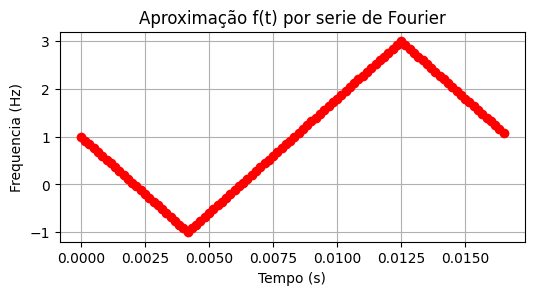

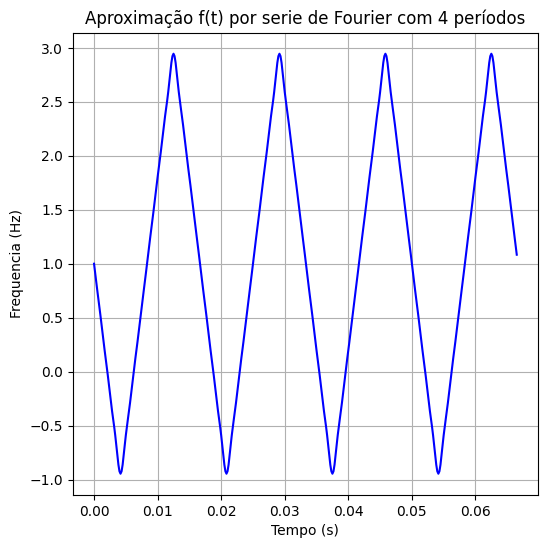

In [111]:
# PSI5892 Fundamentos de Adaptacao e Aprendizado de Maquina
# Exercıcio Computacional – Regressao linear multivariada
# Aluno: Heitor Albuquerque


# Parte 1 - Serie de Fourier da onda triangular

# 1

import numpy as np
import matplotlib.pyplot as plt
import pickle

print("PARTE 1")

def RL_Fourier_HA(t, y, K, w0):


  N = t.shape[0]

  X = np.zeros((N, 2*K+1))

  X[:, [0]] = np.ones((N, 1))



  for j in range(1,2*K,2):
          for i in range(N):
            X[i,j] = np.cos(w0*j*t[i])
            X[i,j+1] = np.sin(w0*j*t[i])

  R = X.T@X
  p = X.T@y

  v = np.linalg.solve(R, p)
  e = y - X @ v
  return X, v, e



# Obtendo y

with open('triang.pickle', 'rb') as f:
    y = pickle.load(f)

# obtendo t
fa = 6000
Ta = 1/fa
Nt = y.shape[0]
t = np.arange(Nt)*Ta
t=t.reshape(-1, 1)

#print("Shape t")
#print(t.shape)

# obtendo w0
f0 = 60
w0 = 2*np.pi*f0

# valor dado de K
K = 7

# Cálculo dos coeficientes da regressão e do vetor de erros
X, v, e = RL_Fourier_HA(t, y, K, w0)



# testando

d = X @ v
#print("Shape d")
#print(d.shape)

plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
plt.plot(t , d, "b")
plt.plot(t , y, "or")
plt.grid()
plt.title( "Aproximação f(t) por serie de Fourier")
plt.xlabel("Tempo (s)")
plt.ylabel("Frequencia (Hz)")


# apresentar 4 períodos
#t4 = np.arange(0.0, 240.0, f0/fa).reshape(-1, 1)

# usando os coeficientes obter as frequências em cada instante t

#N4 = t4.shape[0]
#y4 = np.zeros(N4)
#"y4.reshape(-1,1)
#print(y4.shape)

# repetindo o vetor para plotar 4 periodos
t4 = np.arange(4*Nt)*Ta
t=t.reshape(-1, 1)


concatenated_arrays2 = []

for _ in range(4):
  concatenated_arrays2.append(d)

d4 = np.concatenate(concatenated_arrays2)



#print("Shape t4")
#print(t4.shape)


#print("Shape d4")
#print(d4.shape)


plt.figure(figsize=(6, 6))

plt.plot(t4 , d4, "b")

plt.grid()
plt.title( "Aproximação f(t) por serie de Fourier com 4 períodos")
plt.xlabel("Tempo (s)")
plt.ylabel("Frequencia (Hz)")



"""
# tentativa de fazer 4 vezes o período, que não funcionou
for indexT4 in range(1,K+1):
  y4 = y4 + v[indexT4]*np.cos(w0*indexT4*t4) + v[indexT4+1]*np.sin(w0*indexT4*t4)

y4 = y4 + v[0]

print (y4.shape)
plt.figure(figsize=(12, 12))
#plt.subplot(2, 1, 1)
plt.plot(t4 , y4, "b")
#plt.plot(t , y, "or")
#plt.plot(x , d, "or")
plt.grid()
plt.title(

        "Aproximação f(t) por serie de Fourier 4T"

)
plt.xlabel("Tempo (s)")
plt.ylabel("Frequencia (Hz)")

"""






PARTE 2

Pergunta 1a - É possível ver a interferência de 60 Hz?
Resp 1a - Sim, são as múltiplas subidas e descidas antes e depois do pico.

Pergunta 1b - Esse sinal corresponde a quantos batimentos por minuto?
Resp 1b - São  [180.09004502]  batimentos por minuto.

OBS: A interferência está mascarando possíveis pequenos sinais,
entretanto, se fosse colocado um limiar acima do ruído,
 teriamos apenas um pulso a cada intervalo de tempo de uma figura. 

Pergunta 1c - A pessoa que fez esse exame precisa se preocupar com a saude? Por que?
Resp 1c - Como a frequência de  [180.09004502] é superior a 100 bpm, o paciente deve se preocupar.

Pergunta 1d - Qual a frequência fundamental (em Hz) do sinal de ECG?
Resp 1d - A frequêncenia fundamental é de [3.00150075] Hz.



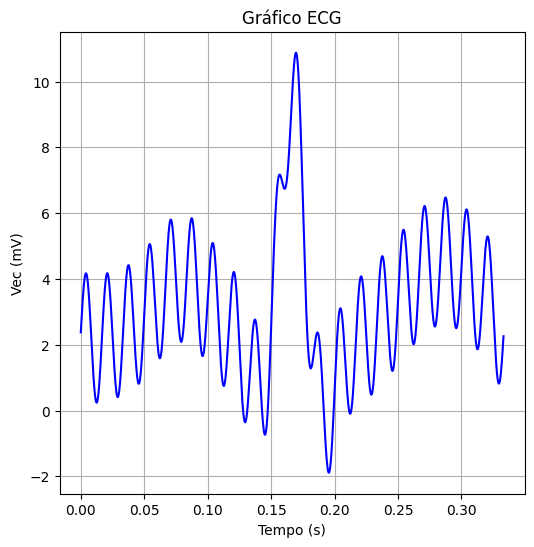

In [107]:

# Parte 2 ECG
print("PARTE 2")

#1 Análise do exame de ECG do paciente

# obtendo y2
with open('ecg.pickle', 'rb') as f:
    y2 = pickle.load(f)

# obtendo t2
fa = 6000
Ta = 1/fa
Nt2 = y2.shape[0]
t2 = np.arange(Nt2)*Ta
t2=t2.reshape(-1, 1)

plt.figure(figsize=(6, 6))

plt.plot(t2 , y2, "b")

plt.grid()
plt.title( "Gráfico ECG")
plt.xlabel("Tempo (s)")
plt.ylabel("Vec (mV)")

# Pergunta 1
print("\nPergunta 1a - É possível ver a interferência de 60 Hz?")

print("Resp 1a - Sim, são as múltiplas subidas e descidas antes e depois do pico.\n")

# Pergunta 1b
print("Pergunta 1b - Esse sinal corresponde a quantos batimentos por minuto?")
bpm = (1/t2[Nt2-1])*60

print("Resp 1b - São ", bpm, " batimentos por minuto.\n")

print("OBS: A interferência está mascarando possíveis pequenos sinais,")
print("entretanto, se fosse colocado um limiar acima do ruído,")
print(" teriamos apenas um pulso a cada intervalo de tempo de uma figura. ")

# Pergunta 1c
print("\nPergunta 1c - A pessoa que fez esse exame precisa se preocupar com a saude? Por que?")
print("Resp 1c - Como a frequência de ", bpm, "é superior a 100 bpm, o paciente deve se preocupar.")

# Pergunta 1d
print("\nPergunta 1d - Qual a frequência fundamental (em Hz) do sinal de ECG?")
f2_0 = 1/t2[Nt2-1]
print(f"Resp 1d - A frequêncenia fundamental é de {f2_0} Hz.\n")


/tmp/ipython-input-3177695400.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X[i,j] = np.cos(w0*j*t[i])
/tmp/ipython-input-3177695400.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X[i,j+1] = np.sin(w0*j*t[i])



Shape â  (31, 1)

Shape ^b  (31, 1)


Text(0, 0.5, 'amplitude')

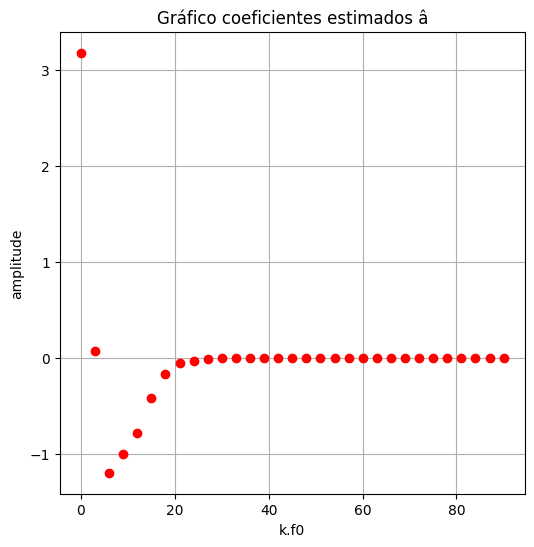

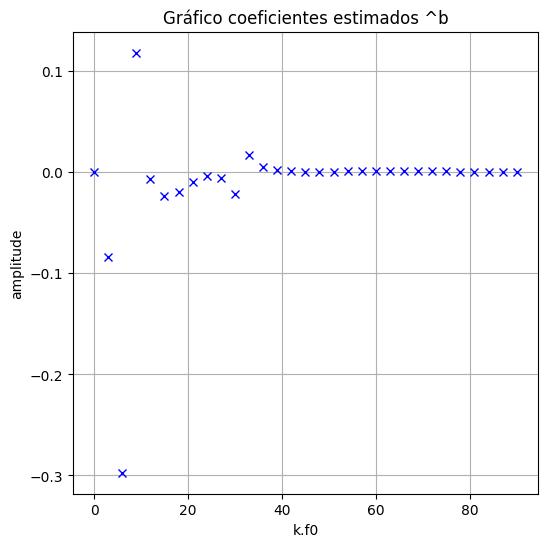

In [108]:
# 2) Usar o programa para obter os coeficientes com K = 30

# parametros t2, y2, k=30, w2_0 = 2*pi*f2_0

w2_0 = 2*np.pi*f2_0
K2 = 30

# Cálculo dos coeficientes da regressão e do vetor de erros
X_k30, v_k30, e_30 = RL_Fourier_HA(t2, y2, K2, w2_0)

# Plotar o grafico dos coeficientes estimados em função de k.f0

kf30 = np.arange(0, 31)*f2_0
kf30 = kf30.reshape(-1,1)
#print("\nShape kf30 ", kf30.shape)
#print("Shape v_k30\n ", v_k30.shape)

vector_a = v_k30[1::2]
element = v_k30[0]

a = np.append(element, vector_a)
a = a.reshape(-1,1)
#print(a)
print("\nShape â ", a.shape)

vector_b = v_k30[2::2]
elementB = 0.0
b = np.append(elementB, vector_b)
b = b.reshape(-1,1)
#print(b)
print("\nShape ^b ", b.shape)

plt.figure(figsize=(6, 6))

plt.plot(kf30 , a, "or")

plt.grid()
plt.title( "Gráfico coeficientes estimados â")
plt.xlabel("k.f0")
plt.ylabel("amplitude")

plt.figure(figsize=(6, 6))

plt.plot(kf30 , b, "xb")

plt.grid()
plt.title( "Gráfico coeficientes estimados ^b")
plt.xlabel("k.f0")
plt.ylabel("amplitude")


Text(0, 0.5, 'amplitude')

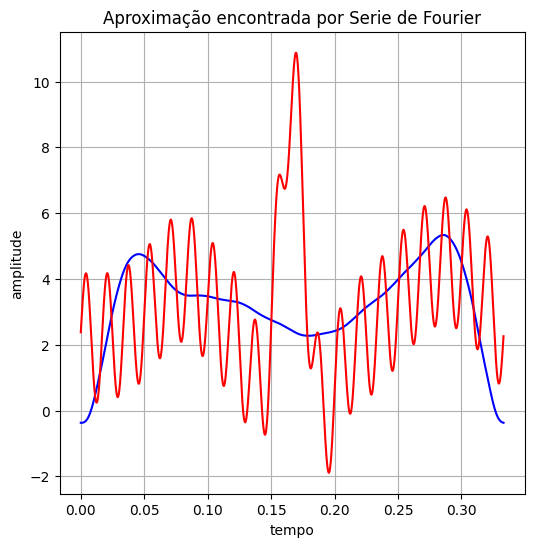

In [109]:
# Para calcular a aproximação temos os vetores a, b, KT

f_t = np.zeros(Nt2)
f_t = f_t.reshape(-1,1)

for indexK in range(K2+1):
  f_t = f_t + a[indexK]*np.cos(w2_0*indexK*t2) + b[indexK]*np.sin(w2_0*indexK*t2)

# Plotar a aproximação para a serie de Fourier

plt.figure(figsize=(6, 6))

plt.plot(t2 , f_t, "b")
plt.plot(t2 , y2, "r")

plt.grid()
plt.title( "Aproximação encontrada por Serie de Fourier")
plt.xlabel("tempo")
plt.ylabel("amplitude")





O valor de k eliminado é  [19.99]




Text(0, 0.5, 'amplitude')

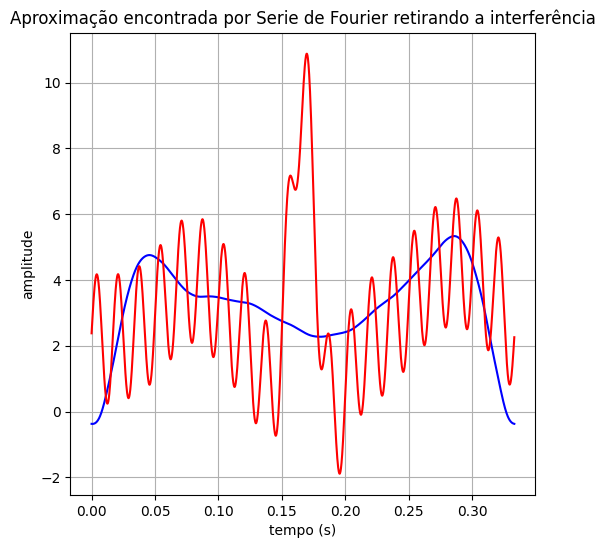

In [113]:
#4 Eliminar os coeficientes correspondentes a interferencia 60hz

# k.fo = 60
# k = 60/f0
# k eliminado ke
ke = 60/f2_0
print("\nO valor de k eliminado é ", ke)
print("\n")

aNot = a
bNot = b
#aNot[np.round(ke)+1]=0
#bNot[np.round(ke)+1]=0

aNot[20]=0
bNot[20]=0


# Para calcular a aproximação temos os vetores a, b, KT

f_tNot = np.zeros(Nt2)
f_tNot = f_tNot.reshape(-1,1)

for indexK in range(K2+1):
  f_tNot = f_tNot + aNot[indexK]*np.cos(w2_0*indexK*t2) + bNot[indexK]*np.sin(w2_0*indexK*t2)

# Plotar a aproximação para a serie de Fourier

plt.figure(figsize=(6, 6))

plt.plot(t2 , f_tNot, "b")
plt.plot(t2 , y2, "r")

plt.grid()
plt.title( "Aproximação encontrada por Serie de Fourier retirando a interferência")
plt.xlabel("tempo (s)")
plt.ylabel("amplitude")